In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from helpers.math_helper import MathHelper

In [2]:
image_seeds = cv2.imread('../data/seeds.jpg', cv2.IMREAD_GRAYSCALE)
image_hawkes = cv2.imread('../data/Hawkes_Bay_NZ.jpg', cv2.IMREAD_GRAYSCALE)
image_kapitol = cv2.imread('../data/capitol.jpg', cv2.IMREAD_GRAYSCALE)
image_flowers = cv2.imread('../data/flowers.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
def getNormalaizedImage(sourceImage,padding):
    
    normalizedImage = np.copy(sourceImage)

    h,w = np.shape(normalizedImage)
    
    for py in range(0,h):
        for px in range(0,w):
            x = sourceImage[py][px]
            
            y_upperLimit = py+padding
            y_lowerLimit = py-padding
            
            x_upperLimit = py+padding
            x_lowerLimit = py-padding
            
            if(y_upperLimit > h):
                y_upperLimit= h
                
            if(y_lowerLimit < 0):
                y_lowerLimit= 0
            
            if(x_lowerLimit > 0):
                x_lowerLimit= 0
            
            if(x_upperLimit > w):
                x_upperLimit= w
            
            imageBox = sourceImage[y_lowerLimit:y_upperLimit][x_lowerLimit:x_upperLimit]
            
             
            min, max = MathHelper.getMinMax(imageBox.ravel())
            
            normalizedImage[py][px] = MathHelper.normalizeWithMinMax(x,min, max)*255;
            
    return normalizedImage

### Result

In [4]:
def display_image(image1,image2,title):

    fig1 = plt.figure(figsize = (12,12))

    hist1 = fig1.add_subplot(4,2,5) 
    hist2 = fig1.add_subplot(4,2,6)

    ax1 = fig1.add_subplot(2,2,1) 
    ax2 = fig1.add_subplot(2,2,2)

    ax1.set_title(title+' original image')
    ax2.set_title('normalized image')

    hist1.hist(image1.ravel(),255,[0,255])
    hist2.hist(image2.ravel(),255,[0,255])


    ax1.imshow(image1, vmin=0, vmax=255, cmap="gray")
    ax2.imshow(image2, vmin=0, vmax=255, cmap="gray")

    plt.show()

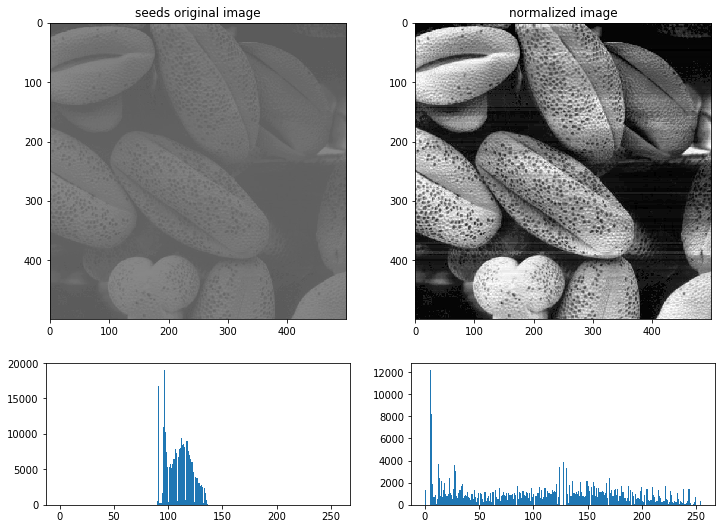

In [5]:
image_seeds_normalized = getNormalaizedImage(image_seeds,2)

display_image(image_seeds,image_seeds_normalized,'seeds')

In [6]:
image_hawkes_normalized = getNormalaizedImage(image_hawkes,2)

display_image(image_hawkes,image_hawkes_normalized,'hawkes')

TypeError: getNormalaizedImage() missing 1 required positional argument: 'padding'

In [ ]:
image_kapitol_normalized = getNormalaizedImage(image_kapitol,2)

display_image(image_kapitol,image_kapitol_normalized,'kapitol')

In [ ]:
image_flowers_normalized = getNormalaizedImage(image_flowers,2)

display_image(image_flowers,image_flowers_normalized,'flowers')